In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [3]:
file_path = "../Dataset/german_credit_data.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              1000 non-null   float64
 1   AgeGroup         1000 non-null   object 
 2   Sex              1000 non-null   object 
 3   Job              1000 non-null   float64
 4   Housing          1000 non-null   object 
 5   SavingAccounts   1000 non-null   object 
 6   CheckingAccount  1000 non-null   object 
 7   CreditAmount     1000 non-null   float64
 8   Duration         1000 non-null   float64
 9   InstallmentRate  1000 non-null   float64
 10  Purpose          1000 non-null   object 
dtypes: float64(5), object(6)
memory usage: 86.2+ KB


(None,
     Age AgeGroup     Sex  Job Housing SavingAccounts CheckingAccount  \
 0  19.0    Young  female  1.0    rent           rich        moderate   
 1  19.0    Young  female  2.0    rent         little         unknown   
 2  20.0    Young    male  2.0    rent        unknown            rich   
 3  20.0    Young  female  2.0    rent         little          little   
 4  20.0    Young  female  2.0     own           rich        moderate   
 
    CreditAmount  Duration  InstallmentRate              Purpose  
 0         983.0      12.0            81.92  furniture/equipment  
 1        1980.0       9.0           220.00  furniture/equipment  
 2        3617.0      24.0           150.71  furniture/equipment  
 3        1282.0      12.0           106.83  furniture/equipment  
 4        1577.0      11.0           143.36  furniture/equipment  )

In [4]:
missing_values = df.isnull().sum()
unique_values = df.nunique()

missing_values, unique_values
print("Missing Values:", missing_values)

Missing Values: Age                1
AgeGroup           1
Sex                1
Job                1
Housing            1
SavingAccounts     1
CheckingAccount    1
CreditAmount       1
Duration           1
InstallmentRate    1
Purpose            1
dtype: int64


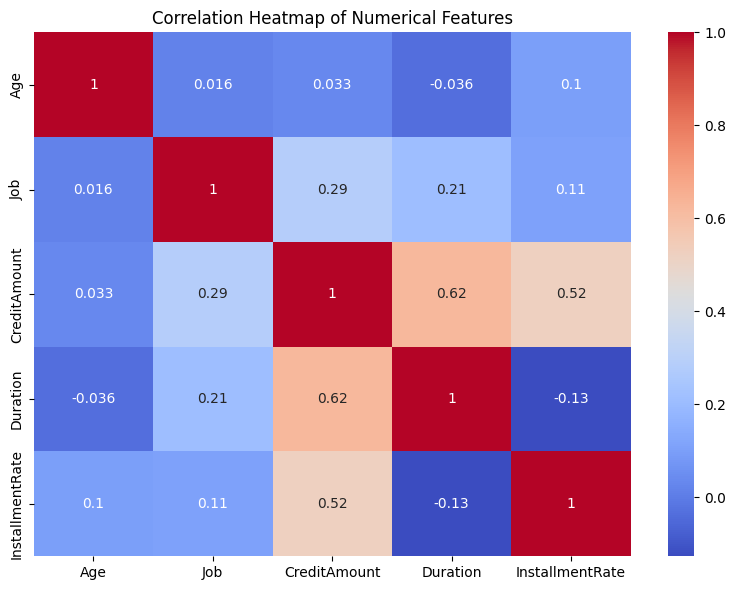

In [5]:
df_clean = df.dropna()

numeric_df = df_clean.select_dtypes(include=["float64", "int64"])
correlation = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

In [6]:
df['CreditRisk'] = ((df['CreditAmount'] <= 2500) & (df['Duration'] <= 15)).astype(int)

Text(0.5, 1.0, 'Average Credit Amount by Credit Risk')

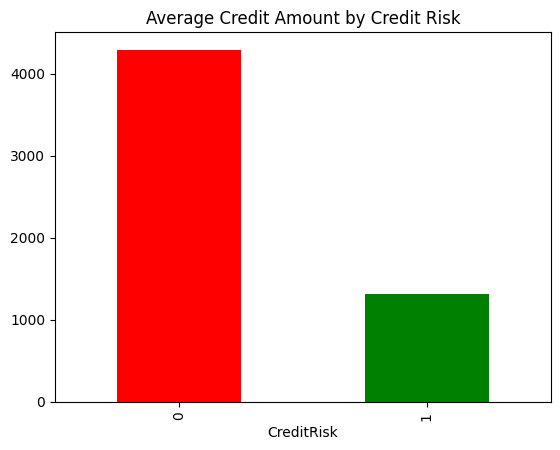

In [7]:
df.groupby('CreditRisk')['CreditAmount'].mean().plot(kind='bar', color=['red', 'green'])
plt.title("Average Credit Amount by Credit Risk")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20044\4071775966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['CreditRisk'] = df['CreditRisk']


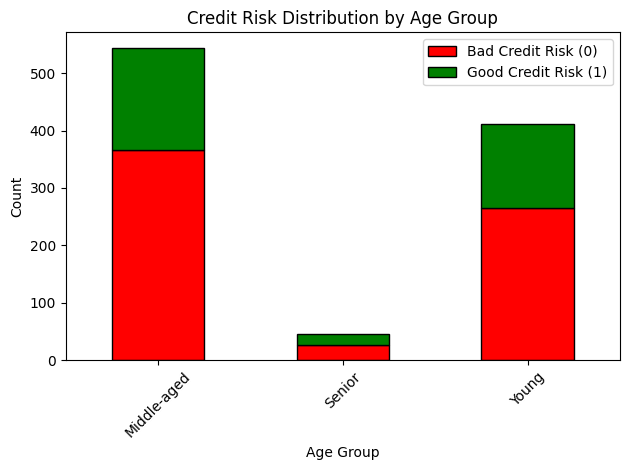

In [8]:
df_clean['CreditRisk'] = df['CreditRisk']

age_group_credit_risk = df_clean.groupby(['AgeGroup', 'CreditRisk']).size().unstack()

age_group_credit_risk.plot(kind='bar', stacked=True, color=['red', 'green'], edgecolor='black')
plt.title("Credit Risk Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(["Bad Credit Risk (0)", "Good Credit Risk (1)"])
plt.tight_layout()
plt.show()

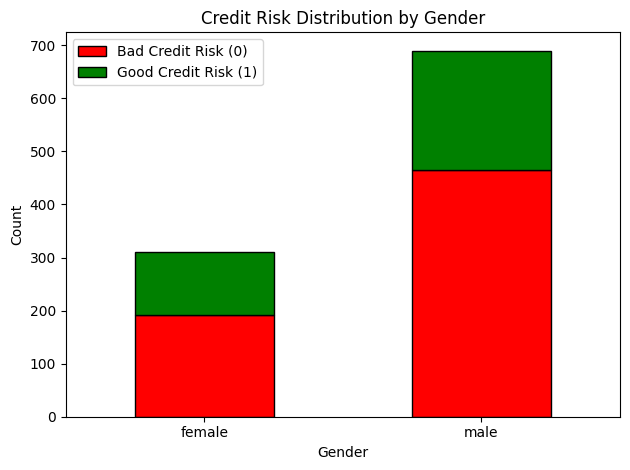

In [9]:
sex_credit_risk = df_clean.groupby(['Sex', 'CreditRisk']).size().unstack()

sex_credit_risk.plot(kind='bar', stacked=True, color=['red', 'green'], edgecolor='black')
plt.title("Credit Risk Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(["Bad Credit Risk (0)", "Good Credit Risk (1)"])
plt.tight_layout()
plt.show()

In [10]:
df.drop(columns=['AgeGroup'], inplace=True)
df.drop(columns=['Housing'], inplace=True)
df.drop(columns=['Sex'], inplace=True)
df.drop(columns=['SavingAccounts'], inplace=True)
df.drop(columns=['CheckingAccount'], inplace=True)
df.drop(columns=['Purpose'], inplace=True)
df.drop(1000, inplace=True)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

df_clean['CreditRisk'] = df['CreditRisk']
X = df_clean[['Age', 'Job', 'CreditAmount', 'Duration', 'InstallmentRate']]
y = df_clean['CreditRisk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20044\1454726292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['CreditRisk'] = df['CreditRisk']


In [12]:
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)

logistic_accuracy = accuracy_score(y_test, logistic_pred)
print("Logistic Regression Accuracy:", logistic_accuracy)
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, logistic_pred))


Logistic Regression Accuracy: 0.99

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       128
           1       0.99      0.99      0.99        72

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



In [13]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("\nSVM Classification Report:\n", classification_report(y_test, svm_pred))

SVM Accuracy: 0.855

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88       128
           1       0.78      0.83      0.81        72

    accuracy                           0.85       200
   macro avg       0.84      0.85      0.84       200
weighted avg       0.86      0.85      0.86       200



In [14]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print("\nGradient Boosting Classification Report:\n", classification_report(y_test, gb_pred))

Gradient Boosting Accuracy: 1.0

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00        72

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [15]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print("\nKNN Classification Report:\n", classification_report(y_test, knn_pred))

KNN Accuracy: 0.965

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       128
           1       0.96      0.94      0.95        72

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



In [16]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, dt_pred))

Decision Tree Accuracy: 1.0

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00        72

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [17]:
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_grid_search = GridSearchCV(estimator=KNeighborsClassifier(),
                               param_grid=knn_param_grid,
                               cv=5,  # 5-fold cross-validation
                               scoring='accuracy',
                               verbose=1,
                               n_jobs=-1)

knn_grid_search.fit(X_train, y_train)

knn_best_params = knn_grid_search.best_params_
knn_best_score = knn_grid_search.best_score_

print("Best Parameters for KNN:", knn_best_params)
print("Best Cross-Validation Accuracy for KNN:", knn_best_score)

knn_best_model = knn_grid_search.best_estimator_
knn_test_pred = knn_best_model.predict(X_test)
knn_test_accuracy = accuracy_score(y_test, knn_test_pred)
print("Test Accuracy with Best KNN Model:", knn_test_accuracy)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best Cross-Validation Accuracy for KNN: 0.9787500000000001
Test Accuracy with Best KNN Model: 0.985


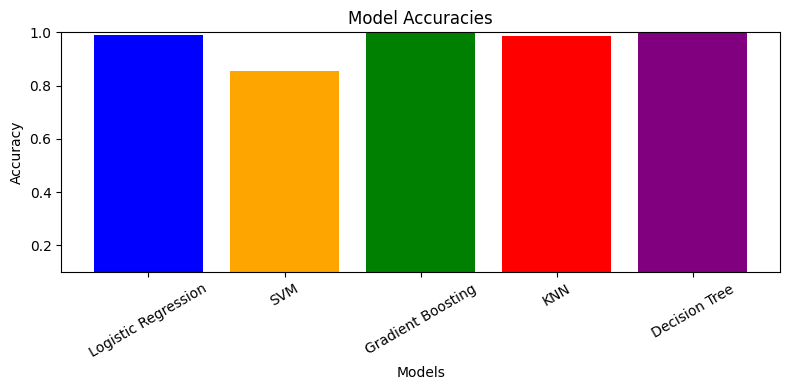

In [18]:
model_names = ['Logistic Regression', 'SVM', 'Gradient Boosting', 'KNN', 'Decision Tree']
accuracies = [
    accuracy_score(y_test, logistic_pred),
    accuracy_score(y_test, svm_pred),
    accuracy_score(y_test, gb_pred),
    knn_test_accuracy,  # KNN
    accuracy_score(y_test, dt_pred)
]

plt.figure(figsize=(8, 4))
plt.bar(model_names, accuracies, color=['blue', 'orange', 'green', 'red', 'purple', 'cyan'])
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.1, 1.0)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [19]:
unique_input = pd.DataFrame({
    'Age': [30],
    'Job': [2],
    'CreditAmount': [2000],
    'Duration': [12],
    'InstallmentRate': [150]
})

unique_prediction = gb_model.predict(unique_input)

print("Prediction for unique input:", unique_prediction)

Prediction for unique input: [1]


In [21]:
import joblib

joblib.dump(gb_model, open("../savedModels/gradient_boosting_model.joblib", "wb"))